In [32]:
from sklearn.datasets import fetch_openml
import pandas as pd
import sys
import seaborn as sb

In [16]:
dataset = fetch_openml("airlines")


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name airlines exist. Versions may be fundamentally different, returning version 1.
  warn(


In [17]:
sys.getsizeof(dataset.data)/1024/1024

15.483579635620117

In [28]:
df = pd.concat((dataset.data,dataset.target),axis=1)

In [29]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269.0,SFO,IAH,3,15.0,205.0,1
1,US,1558.0,PHX,CLT,3,15.0,222.0,1
2,AA,2400.0,LAX,DFW,3,20.0,165.0,1
3,AA,2466.0,SFO,DFW,3,20.0,195.0,1
4,AS,108.0,ANC,SEA,3,30.0,202.0,0
...,...,...,...,...,...,...,...,...
539378,CO,178.0,OGG,SNA,5,1439.0,326.0,0
539379,FL,398.0,SEA,ATL,5,1439.0,305.0,0
539380,FL,609.0,SFO,MKE,5,1439.0,255.0,0
539381,UA,78.0,HNL,SFO,5,1439.0,313.0,1


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


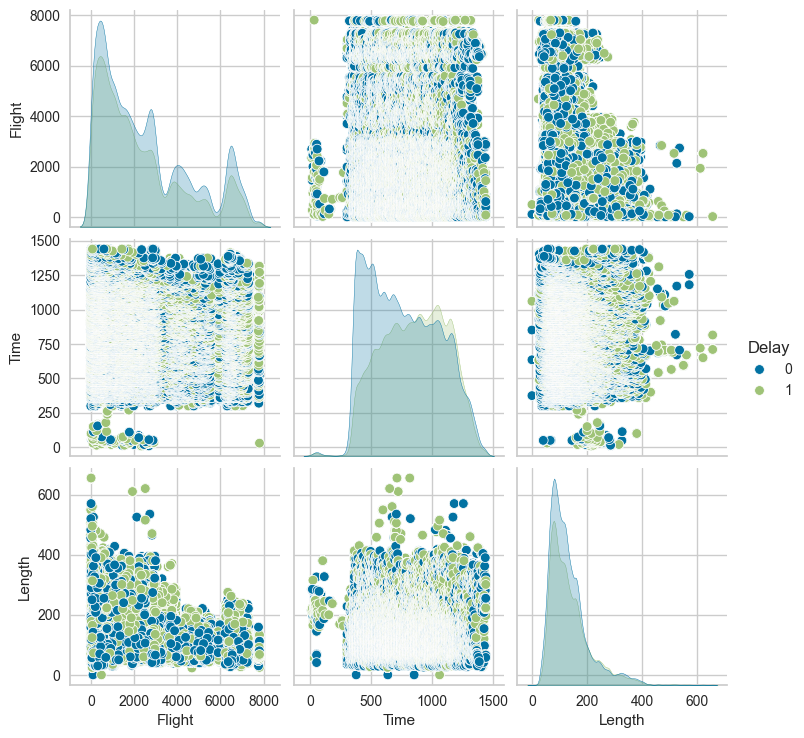

In [33]:
sb.pairplot(df, hue="AirportFrom", size=2.5)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


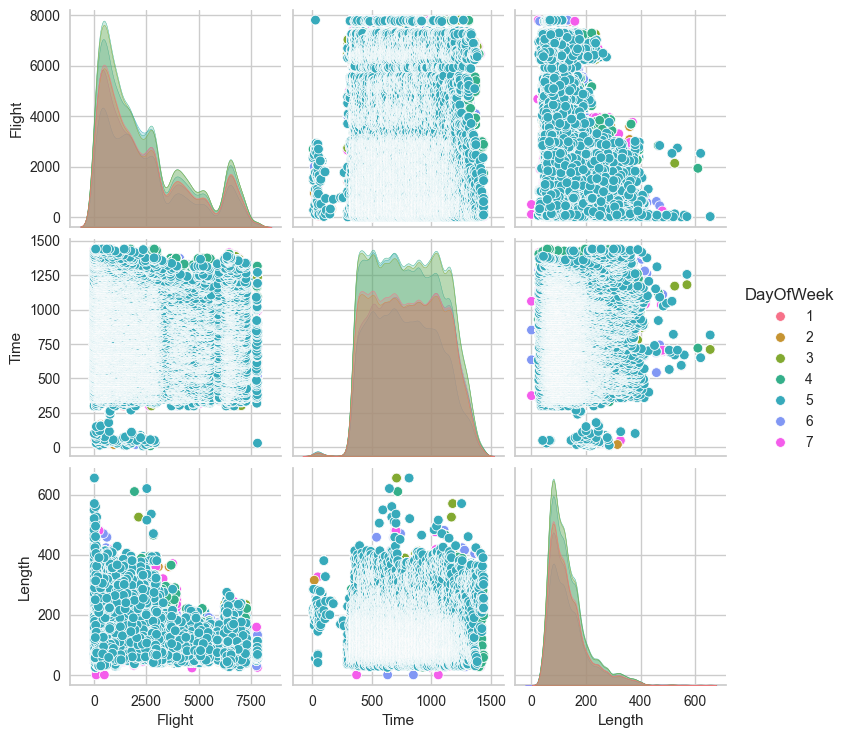

In [35]:
sb.pairplot(df, hue="DayOfWeek", size=2.5)

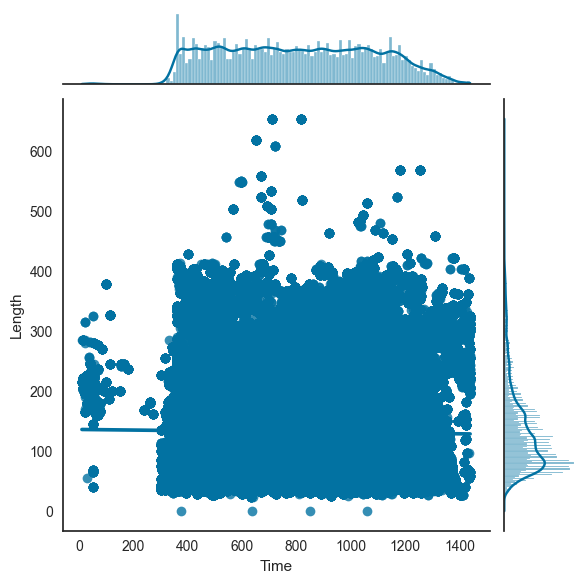

In [40]:
with sb.axes_style('white'):
    sb.jointplot(data=df, kind="reg", x="Time", y="Length")

In [20]:
from pycaret.classification import ClassificationExperiment

In [30]:
exp = ClassificationExperiment()
exp.setup(data=df, target='Delay')

,Description,Value
0,Session id,704
1,Target,Delay
2,Target type,Binary
3,Target mapping,"0: 0, 1: 1"
4,Original data shape,"(539383, 8)"
5,Transformed data shape,"(539383, 31)"
6,Transformed train set shape,"(377568, 31)"
7,Transformed test set shape,"(161815, 31)"
8,Numeric features,3
9,Categorical features,4


In [31]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6580,0.7088,0.6580,0.6593,0.6466,0.2872,0.2985,0.8630
gbc,Gradient Boosting Classifier,0.6508,0.6973,0.6508,0.6544,0.6350,0.2677,0.2836,5.0480
ada,Ada Boost Classifier,0.6435,0.6887,0.6435,0.6415,0.6352,0.2614,0.2678,1.3890
knn,K Neighbors Classifier,0.6385,0.6716,0.6385,0.6362,0.6363,0.2619,0.2627,12.1180
lda,Linear Discriminant Analysis,0.6372,0.6800,0.6372,0.6358,0.6256,0.2443,0.2534,0.5220
ridge,Ridge Classifier,0.6371,0.0000,0.6371,0.6358,0.6254,0.2441,0.2533,0.3830
lr,Logistic Regression,0.6317,0.6706,0.6317,0.6316,0.6167,0.2297,0.2416,0.9480
rf,Random Forest Classifier,0.6168,0.6524,0.6168,0.6152,0.6157,0.2208,0.2210,6.9990
et,Extra Trees Classifier,0.6133,0.6135,0.6133,0.6097,0.6094,0.2070,0.2085,7.1600
dt,Decision Tree Classifier,0.6079,0.6089,0.6079,0.6038,0.6029,0.1940,0.1960,0.6220


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=704, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)